In [66]:
import matplotlib.pyplot as plt
import numpy as np
import random
from math import sqrt, pi, e

In [67]:
def setDataframe():
  yArr = np.linspace(0, 1200, 1000)

  for i in range(len(yArr)):
    x1Arr.append(random.randint(i-50, i+50))
    x2Arr.append(random.randint(i-200, i+200))

  return x1Arr, x2Arr, yArr

def sum(arr):
  sum = 0
  for i in range(len(arr)):
    sum += arr[i]
  return sum

def media(arr):
  summ = sum(arr)
  return summ/len(arr)

def sumBoth(xArr, yArr):
  arr = []
  for i in range(len(xArr)):
    arr.append((xArr[i])*(yArr[i]))

  return sum(arr)

def squareSummatory(arr):
  sum = 0
  for i in range(len(arr)):
    sum += (arr[i]**2)
  return sum

def sumDeltas(arr, med, id):
  if(id == 1):
    sum = 0
    for i in range(len(arr)):
        sum += arr[i] - med
    return sum
  else:
    sum = 0
    for i in range(len(arr)):
      sum += ((arr[i] - med)**2)
    return sum

def beta1(sumXiYi, sumYi, sumXi, sumXiSquare, squareSumXi, size):
  return(
    ((sumXiYi) - ((1/size)*(sumXi)*(sumYi)))
    /
    (sumXiSquare - ((1/size)*(squareSumXi)))
  )

def beta0(size, sumYi, sumXi, beta1):
  return(
    (((1/size)*(sumYi)) - ((1/size)*(beta1)*(sumXi)))
  )


def normalDist(x, mi, sigma):
  dist = []
  for i in range(len(x)):
    dist.append(
      ((1)/(sigma) * (sqrt(2*pi)))
      *
      (e**((-1/2)*(((x[i] - mi)/(sigma))**2)))
    )
  return dist

def function(beta0, beta1, xIn, error):
  return beta0 + beta1 * xIn + error

def setSigmaSquare(yArr):
  return ((1/len(yArr)*(sumDeltas(yArr, media(y), 2))))

def calcResiduos(yArr, yf):
  resid = []
  for i in range(len(yArr)):
    resid.append(yArr[i] - yf[i])

  return resid

def setCorrelationCoef(Sxx, Syy, b1):
  return((b1) * ((Sxx/Syy)**(1/2)))

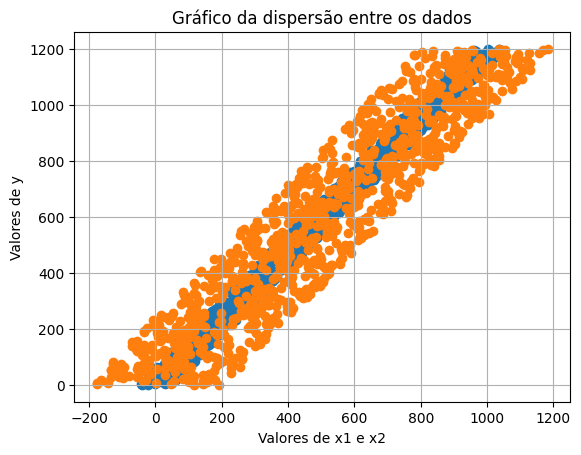

In [84]:
# Letra A

x1Arr = []
x2Arr = []
yArr = []

x1Arr, x2Arr, yArr = setDataframe()

plt.grid()
plt.scatter(x1Arr, yArr, label="x1")
plt.scatter(x2Arr, yArr, label="x2")
plt.title("Gráfico da dispersão entre os dados")
plt.xlabel("Valores de x1 e x2")
plt.ylabel("Valores de y")
plt.show()

In [85]:
# Letra B

# b1, sxx, syy

# Para a x1

sxx_1 = sumDeltas(x1Arr, media(x1Arr), 2)
syy = sumDeltas(yArr, media(yArr), 2)

b1_1 = beta1((sumBoth(x1Arr, yArr)), (sum(yArr)), (sum(x1Arr)), (squareSummatory(x1Arr)), (sum(x1Arr)**2), len(x1Arr))

correlationCoef_1 = setCorrelationCoef(sxx_1, syy, b1_1)
print(f"O coeficiente de correlação entre x e y1 é {correlationCoef_1:.4f}")

# Para a x2

sxx_2 = sumDeltas(x2Arr, media(x2Arr), 2)

b1_2 = beta1((sumBoth(x2Arr, yArr)), (sum(yArr)), (sum(x2Arr)), (squareSummatory(x2Arr)), (sum(x2Arr)**2), len(x2Arr))

correlationCoef_2 = setCorrelationCoef(sxx_2, syy, b1_2)
print(f"O coeficiente de correlação entre x e y2 é {correlationCoef_2:.4f}")

O coeficiente de correlação entre x e y1 é 0.9948
O coeficiente de correlação entre x e y2 é 0.9289


In [70]:
# Letra C: Cálculo do R² de cada uma das variáveis regressoras

In [86]:
# Letra D: Hiperplpano
x = [[1, x1Arr[i], x2Arr[i]] for i in(range(len(x1Arr)))]
y = [[yArr[i]] for i in range(len(yArr))]

x_transpose = np.transpose(x)

prodx = np.dot(x_transpose, x)

prodx_inv = np.linalg.inv(prodx)

prod = np.dot(prodx_inv, x_transpose)

beta = np.dot(prod, y)

print(f"Equação do MRLM: {beta[0][0]:.4f} + {beta[1][0]:.4f} * x1 + {beta[2][0]:.4f} * x2")

Equação do MRLM: 4.6659 + 1.1141 * x1 + 0.0777 * x2


Text(0, 0.5, 'Valores de y')

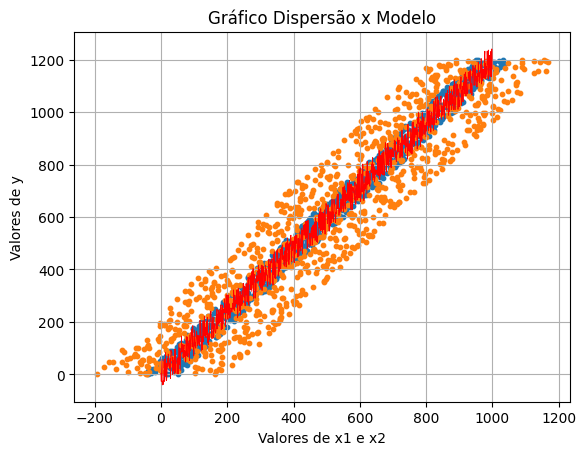

In [78]:
# Letra E
plt.grid()
plt.scatter(x1Arr, yArr, 10, label="x1")
plt.scatter(x2Arr, yArr, 10, label="x2")
y_observed = [[beta[0][0] + beta[1][0] * x1Arr[i] + beta[2][0] * x2Arr[i]] for i in range(len(x1Arr))]
plt.plot(y_observed, color="red", linewidth=0.6, label="model")
plt.title("Gráfico Dispersão x Modelo")
plt.xlabel("Valores de x1 e x2")
plt.ylabel("Valores de y")

Text(0, 0.5, 'valores dos resíduos')

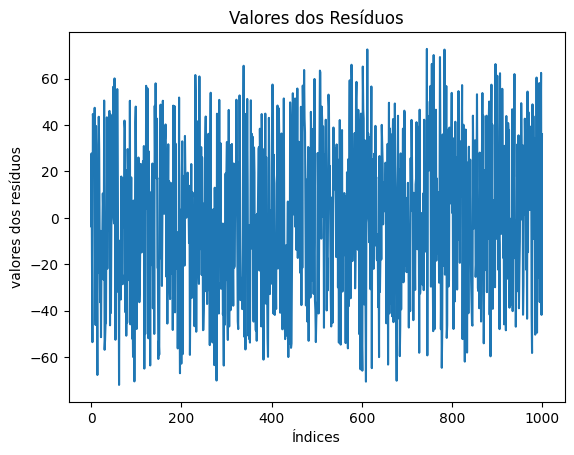

In [79]:
# Letra f

residuos = calcResiduos(yArr, y_observed)
plt.plot(residuos)
plt.title("Valores dos Resíduos")
plt.xlabel("Índices")
plt.ylabel("valores dos resíduos")

Text(0, 0.5, 'Número de ocorrências')

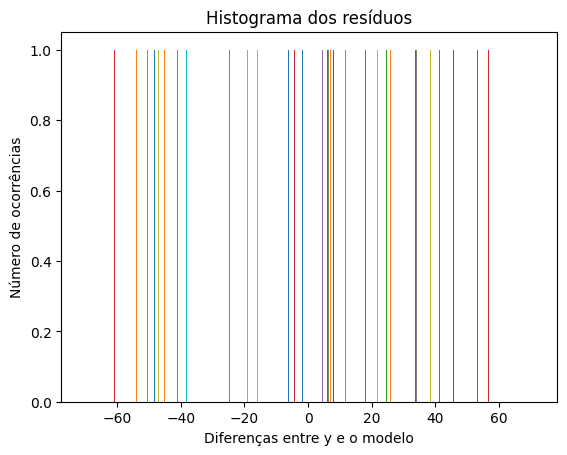

In [80]:
# Letra G

(n, bins) = np.histogram(residuos, 10)
plt.hist(residuos, bins=bins)
plt.title("Histograma dos resíduos")
plt.xlabel("Diferenças entre y e o modelo")
plt.ylabel("Número de ocorrências")

# Comentário: De acordo com o gráfico plotado abaixo, é possível perceber que a minoria foi repetida somente uma vez, enquanto que a grande maioria, nenhuma vez. Além disso, pode-se perceber que nennum dado foi perfeitamente previsto pelo modelo, dada a diferença entre os dados, entretanto, através dele, é possível ter uma estimativa de quanto se dá sua variação.